<a href="https://colab.research.google.com/github/alklyatov/ML-DL_LR/blob/main/LR_1_Klyatov_Shilov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Подключим библиотеки, используемые в работе. В качестве изначального набора данных будем использовать таблицу TOP-250 фильмов на Кинопоиске. Таблицу загрузим в облачное хранилище Google Drive. Разделителем будет запятая. 


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
%matplotlib inline

from google.colab import drive
drive.mount ('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/NetflixOriginals.csv', sep=',',encoding='latin-1')

Mounted at /content/drive


Выведем первые 10 строк таблицы.


In [ ]:
data.head(10)

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
5,Drive,Action,"November 1, 2019",147,3.5,Hindi
6,Leyla Everlasting,Comedy,"December 4, 2020",112,3.7,Turkish
7,The Last Days of American Crime,Heist film/Thriller,"June 5, 2020",149,3.7,English
8,Paradox,Musical/Western/Fantasy,"March 23, 2018",73,3.9,English
9,Sardar Ka Grandson,Comedy,"May 18, 2021",139,4.1,Hindi


Посмотрим полную инфомацию по таблице. В качестве предсказываемого объекта 
будет 'IMDB Score'.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


Исходя из вышеувиденного, можно сделать вывод, что в таблице всего 584 строк, среди которых ни одного нулевого объекта. Так же можно заметить, что в нашей выборке есть такие объекты как 'Title', 'Genre'.Очевидно, что они нам не понадобятся, поэмтоу удалим их. 

In [ ]:
data = data.drop(['Title','Genre'],axis = 'columns' ) 

Выведем типы данных, используемые в таблице.

In [ ]:
data.dtypes

Premiere       object
Runtime         int64
IMDB Score    float64
Language       object
dtype: object

Так как текстовые переменные обработать мы не можем, посмотрим на значения которые принимают объекты 'Premiere' и 'Language'.

In [ ]:
data['Language'].value_counts()

English                       401
Hindi                          33
Spanish                        31
French                         20
Italian                        14
Portuguese                     12
Indonesian                      9
Japanese                        6
Korean                          6
English/Spanish                 5
Turkish                         5
German                          5
Marathi                         3
Polish                          3
Dutch                           3
English/Hindi                   2
English/Mandarin                2
Filipino                        2
English/Japanese                2
Thai                            2
Norwegian                       1
English/Arabic                  1
Bengali                         1
Tamil                           1
Georgian                        1
Spanish/Catalan                 1
English/Taiwanese/Mandarin      1
English/Swedish                 1
Khmer/English/French            1
Malay         

Заменим значения этого признака на количество "языков" в группе.


In [ ]:
counts = data['Language'].value_counts()
nan_count = data['Language'].isnull().sum()
def replace_lang(lang):
    if pd.isnull(lang):
        return nan_count
    return counts[lang]
data['Language'] = data['Language'].apply(replace_lang)

Заменим дату выхода фильма на год. 

In [ ]:
premier = data['Premiere']
for i in range(len(premier)):
  premier[i] = int(re.sub('.+ \d+. ', '', str(premier[i])))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Посмотрим на корреляцию признаков между собой. Построим графическое представление модуля значения корреляции попарно между признаками.

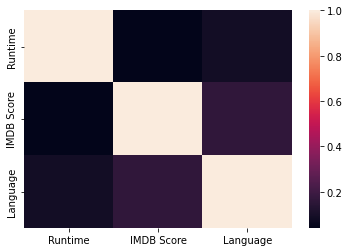

In [ ]:
corr = data.corr().abs()
sns.heatmap(corr,
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values)

Как видим из тепловой карты выше, признаки почти не корелируют между собой. Замним параметр рейтинга на булвый. Пусть если рейтинг будет 6 или больше, булевый параметр будет равен 1, что означает "годный", иначе 0.

In [ ]:
rating = data['IMDB Score']
for i in range (len(rating)):
  if rating[i] >= 6: rating[i] = 1
  else: rating[i] = 0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Посмотрим на получившиеся данные.

In [ ]:
data.tail(10)

,Premiere,Runtime,IMDB Score,Language
574,2021,89,1.0,401
575,2020,109,1.0,31
576,2017,114,1.0,401
577,2019,51,1.0,401
578,2020,85,1.0,401
579,2018,125,1.0,401
580,2015,91,1.0,1
581,2018,153,1.0,401
582,2020,89,1.0,12
583,2020,83,1.0,401


Поскольку аномальные и нулевые значений отсутствуют, перейдем к шагу машинного обучения.Выделим в нашей выборке целевую переменную, а также разделим ее на тренировочную и тестовую.

In [ ]:
X = data[data.columns[:-1]]
y = data['IMDB Score']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

Далее проведем классификацию с помозью метода ближайших соседей. Так же подсчитаем долю верных ответов алгоритма на тестовой выборке.

In [ ]:
# импортируем класс классификатора по ближайшим соседям
from sklearn.neighbors import KNeighborsClassifier

# создадим наш классификатор. Гиперпараметр у этого алгоритма один - количество соседей.
clf = KNeighborsClassifier(n_neighbors=5)
# обучим классификатор на тренировочной выборке
clf.fit(X_train, y_train)
# подсчитаем долю верных ответов алгоритма на тестовой выборке.
# Есть и другие метрики качества - о них будет рассказано на следующей лабе
clf.score(X_test, y_test)
clf.score(X_test, y_test)

0.8013698630136986

Посмотрим влияение гиперпараметра, а так же нарисуем графики.

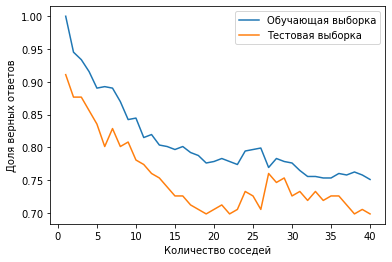

In [ ]:
train_scores = {}
test_scores = {}

# для n в диапазоне от 1 до 40 включительно
for n in range(1, 41):
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(X_train, y_train)
    # значение качества на текущей итерации:
    current_train_score = clf.score(X_train, y_train)
    current_test_score = clf.score(X_test, y_test)
    # запишем его в наши словари
    train_scores[n] = current_train_score
    test_scores[n] = current_test_score

# нарисуем графики

plt.plot( list (train_scores.keys()),list (train_scores.values()), label='Обучающая выборка')
plt.plot( list (test_scores.keys()), list (test_scores.values()), label='Тестовая выборка')
plt.xlabel('Количество соседей')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()